In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import zipfile
from collections import Counter
import random

# DATA PROCESSING

In [7]:
#directory = "Buckeye_Corpus_Unzipped"
directory = "Buckeye_Corpus_Files"

All_Documents = []
Combined_Document = []
for root, subdirectories, files in os.walk(directory):
    #for subdirectory in subdirectories:
        #print(os.path.join(root, subdirectory))
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.split(".")[1] == 'words':
            F = open(file_path)
            Lines = F.readlines()
            Doc = []
            ## Cleaning so we just get the words from the file.
            ## Access line[3] in order to get the timestamp. 
            for i in range(len(Lines)):
                line = Lines[i]
                line = line.split(' ')
                if line[0] == '':
                    word = line[5].split(';')[0]
                    #print(word)
                    if word.startswith('<'):
                        pass
                    elif word.startswith('{'):
                        pass
                    else:
                        Doc.append(word.lower())
                        Combined_Document.append(word.lower())
            All_Documents.append(Doc)

## Remove anything non alphabet - punctuation or numbers
Combined_Document = [word for word in Combined_Document if word.isalpha()]

In [55]:
len(Combined_Document)

264165

# Pickling Word Lists

In [61]:
'''import pickle
Master_Dict = pickle.load(open("Master_Dict_Update.pkl", "rb"))'''

In [62]:
'''Master_Dict['Buckeye Corpus'] = Combined_Document
Master_Dict['Jane Austen Novels'] = Jane_Austen_Word_List
'''

In [ ]:
'''### Sanity Check ### 
len(Master_Dict["Spotify Podcasts"])'''

In [65]:
'''pickle.dump(Master_Dict, open("Master_Dict_Update_2.pkl", "wb"))'''

In [63]:
'''Master_Dict.keys()'''

dict_keys(['Spotify Podcasts', 'TEDLIUM Corpus', 'Buckeye Corpus', 'Jane Austen Novels'])

# Original Prelim Analysis

In [8]:
word_count = Counter(Combined_Document)
count_count = Counter(word_count)

count_count = sorted(count_count.items(), key=lambda pair: pair[1], reverse=True)
count_words = np.asarray(count_count)[:,0]
freq_of_word_counts = np.asarray(count_count)[:,1]

In [13]:
count_count

[('i', 12078),
 ('and', 10786),
 ('the', 8237),
 ('to', 6316),
 ('a', 6051),
 ('that', 5740),
 ('it', 4507),
 ('of', 4286),
 ('you', 4280),
 ('like', 4013),
 ('yknow', 3557),
 ('uh', 3538),
 ('in', 3528),
 ('they', 3453),
 ('was', 2992),
 ('but', 2915),
 ('so', 2665),
 ('yeah', 2628),
 ('just', 2414),
 ('um', 2406),
 ('have', 2092),
 ('is', 1854),
 ('my', 1832),
 ('for', 1784),
 ('know', 1769),
 ('think', 1755),
 ('we', 1698),
 ('he', 1695),
 ('do', 1598),
 ('there', 1598),
 ('on', 1533),
 ('or', 1520),
 ('not', 1497),
 ('be', 1482),
 ('mean', 1473),
 ('with', 1445),
 ('because', 1444),
 ('people', 1292),
 ('really', 1290),
 ('well', 1289),
 ('what', 1288),
 ('all', 1209),
 ('if', 1201),
 ('this', 1151),
 ('out', 1149),
 ('at', 1138),
 ('get', 1121),
 ('about', 1096),
 ('them', 1088),
 ('are', 1078),
 ('go', 1055),
 ('when', 1053),
 ('me', 1020),
 ('she', 1017),
 ('one', 992),
 ('then', 989),
 ('had', 979),
 ('as', 917),
 ('up', 915),
 ('would', 886),
 ('right', 880),
 ('lot', 811),
 (

# Dataset Description

**255 recorded conversations with 40 different speakers**

**264,165 words transcribed**

**9139 unique words**

In [14]:
len(Combined_Document)

264165

In [15]:
len(set(Combined_Document))

9132

# Zipf's Law

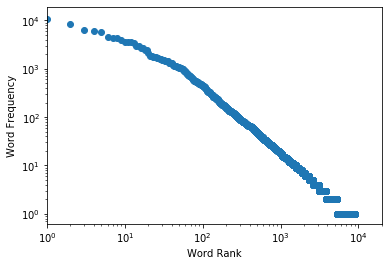

In [16]:
rank_list = []
freq_list = []
for i in range(len(count_count)):
    x = count_count[i][1]
    freq_list.append(x)
    rank_list.append(i)

f,ax = plt.subplots()
ax.scatter(rank_list, freq_list, label = "data")
ax.set_xlabel('Word Rank')
ax.set_ylabel('Word Frequency')
ax.set_xscale("log")
ax.set_xlim(1,20000)
ax.set_yscale("log")

In [17]:
freq_list

[12078,
 10786,
 8237,
 6316,
 6051,
 5740,
 4507,
 4286,
 4280,
 4013,
 3557,
 3538,
 3528,
 3453,
 2992,
 2915,
 2665,
 2628,
 2414,
 2406,
 2092,
 1854,
 1832,
 1784,
 1769,
 1755,
 1698,
 1695,
 1598,
 1598,
 1533,
 1520,
 1497,
 1482,
 1473,
 1445,
 1444,
 1292,
 1290,
 1289,
 1288,
 1209,
 1201,
 1151,
 1149,
 1138,
 1121,
 1096,
 1088,
 1078,
 1055,
 1053,
 1020,
 1017,
 992,
 989,
 979,
 917,
 915,
 886,
 880,
 811,
 800,
 785,
 739,
 735,
 727,
 725,
 722,
 698,
 666,
 664,
 640,
 631,
 628,
 616,
 582,
 575,
 564,
 563,
 558,
 557,
 551,
 544,
 543,
 540,
 531,
 514,
 512,
 506,
 492,
 491,
 489,
 484,
 478,
 474,
 471,
 471,
 468,
 458,
 448,
 443,
 440,
 433,
 426,
 418,
 417,
 410,
 395,
 389,
 386,
 377,
 369,
 359,
 355,
 354,
 353,
 337,
 335,
 334,
 332,
 331,
 330,
 327,
 319,
 311,
 302,
 298,
 298,
 295,
 290,
 287,
 287,
 282,
 280,
 279,
 266,
 266,
 265,
 264,
 264,
 263,
 262,
 261,
 258,
 254,
 246,
 245,
 243,
 241,
 241,
 240,
 236,
 234,
 232,
 232,
 231,
 2

# Heap's Law

In [18]:
Mega_Doc = []
Doc_Sizes = []
Vocab_Sizes = []
for i in range(len(All_Documents)):
    for word in All_Documents[i]:
        Mega_Doc.append(word)
    x = len(Mega_Doc)
    y = len(set(Mega_Doc))
    Doc_Sizes.append(x)
    Vocab_Sizes.append(y)   

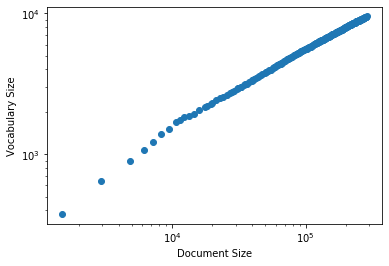

In [53]:
f,ax = plt.subplots()
ax.scatter(Doc_Sizes, Vocab_Sizes, label = "data")
ax.set_xlabel('Document Size')
ax.set_ylabel('Vocabulary Size')
ax.set_xscale("log")
ax.set_yscale("log")

# Brevity Law

(1, 9516)

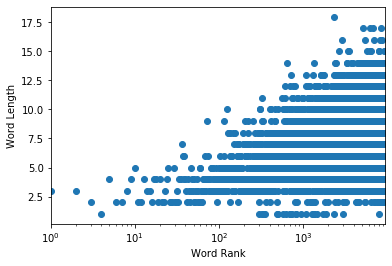

In [20]:
rank_list = []
brevity_list = []
for i in range(len(count_count)):
    y = len(count_count[i][0])
    brevity_list.append(y)
    rank_list.append(i)
    

# Rank-Brevity Plot
f,ax = plt.subplots()
ax.scatter(rank_list, brevity_list, label = "data")
ax.set_xlabel('Word Rank')
ax.set_ylabel('Word Length')
ax.set_xscale("log")
ax.set_xlim(1,9516)

In [21]:
count_count

[('i', 12078),
 ('and', 10786),
 ('the', 8237),
 ('to', 6316),
 ('a', 6051),
 ('that', 5740),
 ('it', 4507),
 ('of', 4286),
 ('you', 4280),
 ('like', 4013),
 ('yknow', 3557),
 ('uh', 3538),
 ('in', 3528),
 ('they', 3453),
 ('was', 2992),
 ('but', 2915),
 ('so', 2665),
 ('yeah', 2628),
 ('just', 2414),
 ('um', 2406),
 ('have', 2092),
 ('is', 1854),
 ('my', 1832),
 ('for', 1784),
 ('know', 1769),
 ('think', 1755),
 ('we', 1698),
 ('he', 1695),
 ('do', 1598),
 ('there', 1598),
 ('on', 1533),
 ('or', 1520),
 ('not', 1497),
 ('be', 1482),
 ('mean', 1473),
 ('with', 1445),
 ('because', 1444),
 ('people', 1292),
 ('really', 1290),
 ('well', 1289),
 ('what', 1288),
 ('all', 1209),
 ('if', 1201),
 ('this', 1151),
 ('out', 1149),
 ('at', 1138),
 ('get', 1121),
 ('about', 1096),
 ('them', 1088),
 ('are', 1078),
 ('go', 1055),
 ('when', 1053),
 ('me', 1020),
 ('she', 1017),
 ('one', 992),
 ('then', 989),
 ('had', 979),
 ('as', 917),
 ('up', 915),
 ('would', 886),
 ('right', 880),
 ('lot', 811),
 (

# MLE

In [22]:
import numpy as np
from scipy.optimize import minimize
from scipy.special import zeta
import mpmath as mpm

def wfd_lin(x):
    '''In: x...list with floats representing data...size of all the words
       Out: k, P(k)...how many words with length k
            array is only constructed for those k-values for which Pk > 0!!!
    '''
    x.sort()
    k = []
    P_k = []
    count_temp = 0
    total = float(len(x))

    for i in np.arange(len(x)):
        if x[i] != count_temp:
            k += [float(x[i])]
            P_k += [float(1)]
            count_temp = x[i]
        else:
            P_k[-1] += 1.0
    P_k = np.array(P_k)/total
    return np.array(k),P_k
    
def wfd_histo(x):
    '''In: x...list with floats representing data...size of all the words
       Out: k, N(k)...how many words with length k
            array is only constructed for those k-values for which Pk > 0!!!
    '''
    x.sort()
    k = []
    N_k = []
    count_temp = 0
    N = float(len(x))
    i = 0
    while i < N:
        if x[i] != count_temp:
            k += [float(x[i])]
            N_k += [float(1)]
            count_temp = x[i]
        else:
            N_k[-1] += 1.0
        i += 1
    return np.array(k),np.array(N_k)

    
## zeta function
def zeta_minmax(gamma,kmin,kmax):
    '''kmax == None means kmax --> infty
    '''
#     gamma = gamma[0]
    if gamma <= 1.0:
        if kmax == None:
            print('ERROR: Series does not converge!!!')
            C = 0
        else:
            mpm.dps=25
#             print(gamma,kmin,kmax,'huhu')
            C = (float(mpm.sumem(lambda k: k**(-gamma),[kmin,kmax])))
    else:
        # print(kmax)
        # print(type(kmax))
        # print(kmax==None)
        # print('')
        if isinstance(kmax,(list,np.ndarray)):
            C = zeta(gamma,kmin)-zeta(gamma,kmax)
        elif kmax == None:
            C = zeta(gamma,kmin)
        else:
            C = zeta(gamma,kmin)-zeta(gamma,kmax)
        # print(C)
    return C
    
def zeta_minmax_cont(gamma,kmin,kmax):
    '''kmax == None means kmax --> infty
    '''
    if kmax==None:
        if gamma > 1.0:
            C = 1.0/(gamma-1)*(kmin**(1-gamma))
        else:
            C = -1#1.0/(gamma-1)*(kmin**(1-gamma) - kmax**(1-gamma))
            print('Error')
    else:
        C = 1.0/(gamma-1)*(kmin**(1-gamma) - kmax**(1-gamma))
    return C

## Leastsquares
def leastsquare(x,y):
    '''least square for y = a0 +a1*x
    '''
    a_0 = (sum(y)*sum(x*x) - sum(x)*sum(x*y))/(len(x)*sum(x*x) - (sum(x))**2.0)
    a_1 = (len(x)*sum(x*y) - sum(x)*sum(y))/(len(x)*sum(x*x) - (sum(x))**2.0)
    return a_0,a_1
    
## Filter functions
def filter_xy(x,y,xmin,xmax,ymin,ymax):
    '''filter where P(k) = 0 when bin in histogram still empty and y = P_k < kmin
    '''
    ind_del_ymin = np.where(y<ymin)[0]
    ind_del_ymax = np.where(y>ymax)[0]
    ind_del_y = np.append(ind_del_ymin,ind_del_ymax)
    
    if xmin != None:
        ind_del_xmin = np.where(x<xmin)[0]
    else:
        ind_del_xmin = []
    if xmax != None:
        ind_del_xmax = np.where(x>xmax)[0]
    else:
        ind_del_xmax = []
    ind_del_x = np.append(ind_del_xmin,ind_del_xmax)
    
    ind_del = np.append(ind_del_y,ind_del_x)
    x_f = np.delete(x,ind_del) 
    y_f = np.delete(y,ind_del)
    return x_f,y_f

def filter_x(x,xmin,xmax):
    '''filter where P(k) = 0 when bin in histogram still empty and y = P_k < kmin
       if xmin or xmax = None it means that it does not exist
    '''
    if xmin != None:
        ind_del_xmin = np.where(x<xmin)[0]
    else:
        ind_del_xmin = []
    if xmax != None:
        ind_del_xmax = np.where(x>xmax)[0]
    else:
        ind_del_xmax = []
    ind_del = np.append(ind_del_xmin,ind_del_xmax)
    
    x_f = np.delete(x,ind_del) 
    return x_f
    


## 2 powerlaws: pk = c*k**(-gamma1) if k<= km, c*km**(gamma2-gamm1)*k**(-gamma2) if k >= km
# faktor fuer k>=km ergibt sich durch anschlussbedingung

def pdf_2exp_disc(x,kmin,kmax,gamma1,gamma2,km):
    '''returns discrete power law with cutoff kmin,kmax...including kmax as last element
       therefore kmax+1 in argument. 
    '''
    if kmax == None:
        C = 1.0/(zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax) )
    else:
        C = 1.0/(zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax+1) )
    pk = C*((x<=km)*x**(-gamma1) + (x>km)*km**(gamma2-gamma1)*x**(-gamma2))
    return pk
    
def cdf_2exp_disc(x,kmin,kmax,gamma1,gamma2,km):
    '''returns discrete power law with cutoff kmin,kmax...including kmax as last element
       therefore kmax+1 in argument. 
    '''
    zeta_km = zeta_minmax(gamma1,kmin,km+1)
    if kmax == None:
        C = 1.0/(zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax) )
    else:
        C = 1.0/(zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax+1) )
    Fk = C*((x<=km)*zeta_minmax(gamma1,kmin,x+1) + (x>km)*(zeta_km + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,x+1)))
    return Fk


## fit 3 parameters, gamma1 as well
def mle_disc_minmax_optimize_2expzipf_3par(x,kmin,kmax,gamma1_0,gamma2_0,km_0,method = 'Nelder-Mead'):
    N = float(len(x)) #types
    M = float(sum(x)) #tokens
    x = np.sort(x)[::-1]
    rlog = np.log(np.arange(N)+1)
    
    D0 = sum((x/M)*rlog)
    # result = fmin(func_mle_disc_2expzipf_2par, [gamma2_0,km_0], args=(x,N,M,D0,kmin,kmax,gamma1),xtol=10**(-6),ftol=10**(-6),disp=0,full_output=1)
    result = minimize(
        func_mle_disc_2expzipf_3par, 
        [gamma1_0,gamma2_0,km_0], 
        args=(x,N,M,D0,kmin,kmax),
        # bounds = ((1.0,None),(1.,None)),
        options = {'disp':False},
        method=method)
    # convergence message 0...good,1...bad
    # warnflag = result[4]
    warnflag = result['success']
    if warnflag != True:
        print('No convergence in maximizing likelihood!')
    return result



## fit only 2 parameters
def mle_disc_minmax_optimize_2expzipf_2par(x,kmin,kmax,gamma1,gamma2_0,km_0,method = 'Nelder-Mead'):
    N = float(len(x)) #types
    M = float(sum(x)) #tokens
    x = np.sort(x)[::-1]
    rlog = np.log(np.arange(N)+1)
    
    D0 = sum((x/M)*rlog)
    # result = fmin(func_mle_disc_2expzipf_2par, [gamma2_0,km_0], args=(x,N,M,D0,kmin,kmax,gamma1),xtol=10**(-6),ftol=10**(-6),disp=0,full_output=1)
    result = minimize(
        func_mle_disc_2expzipf_2par, 
        [gamma2_0,km_0], 
        args=(x,N,M,D0,kmin,kmax,gamma1),
        # bounds = ((1.0,None),(1.,None)),
        options = {'disp':False},
        method=method)
    # convergence message 0...good,1...bad
    # warnflag = result[4]
    warnflag = result['success']
    if warnflag != True:
        print('No convergence in maximizing likelihood!')
    return result

def func_mle_disc_2expzipf_2par(params,x,N,M,D0,kmin,kmax,gamma1):
    gamma2 = params[0]
    if kmax==None:
        eps=10.0**(-6)
        if gamma2 <= 1.:
            gamma2=1. + eps
    km = int(np.abs(params[1]))
    # print(gamma2,km,gamma1,N)
    if kmax == None:
        C = zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax) 
    else:
#         print(zeta_minmax(gamma1,kmin,km+1))
#         print(zeta_minmax(gamma2,km+1,kmax+1))
        C = zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax+1)
    if km > N:
        summe1 = sum((x/M)*np.log(np.arange(N)+1))
    else:
#         print(km)
        summe1 = sum((x[:int(km)]/M)*np.log(np.arange(int(km))+1))
    summe2 = D0 - summe1
    summe3 = sum((x[int(km)+1:]/M))
    L = np.log(C) + gamma1*summe1 + gamma2*summe2 - summe3*(gamma2-gamma1)*np.log(km)
    return L

def func_mle_disc_2expzipf_3par(params,x,N,M,D0,kmin,kmax):
    gamma1 = params[0]
    gamma2 = params[1]
    if kmax==None:
        eps=10.0**(-6)
        if gamma2 <= 1.:
            gamma2=1. + eps
    km = int(np.abs(params[2]))
    # print(gamma2,km,gamma1,N)
    if kmax == None:
        C = zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax) 
    else:
#         print(zeta_minmax(gamma1,kmin,km+1))
#         print(zeta_minmax(gamma2,km+1,kmax+1))
        C = zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax+1)
    if km > N:
        summe1 = sum((x/M)*np.log(np.arange(N)+1))
    else:
#         print(km)
        summe1 = sum((x[:int(km)]/M)*np.log(np.arange(int(km))+1))
    summe2 = D0 - summe1
    summe3 = sum((x[int(km)+1:]/M))
    L = np.log(C) + gamma1*summe1 + gamma2*summe2 - summe3*(gamma2-gamma1)*np.log(km)
    return L



In [23]:
def fit_double_powerlaw(counts,nrep,rmin_fit,rmax_fit):
    '''Fits the double power-law model'''
    gamma1 = 1.0 # gamma1 is fixed
    L = np.inf # normalized negative log-likelihood
    gamma2 = -1
    rm = -1
    # range to sample initial conditions for the free parameters
    x1_0 = (1.,3.)
    x2_0 = (1.,10**4)
    n_success = 0
    np.random.seed(41)
    for i_nrep in range(nrep):

        gamma2_0 =  np.random.random()*( x1_0[1]-x1_0[0]  ) + x1_0[0] 
        rm_0 = int(  np.random.random()*( x2_0[1]-x2_0[0]  ) + x2_0[0] )
    #     print(gamma2_0,rm_0)
        result = mle_disc_minmax_optimize_2expzipf_3par(counts,rmin_fit,rmax_fit,gamma1,gamma2_0,rm_0)

        gamma1_tmp, gamma2_tmp,rm_tmp = result['x']
        L_tmp = result['fun']
        warnflag = result['success']
        if warnflag==True:
            n_success+=1
        if L_tmp<L and warnflag==True:
            L=L_tmp
            gamma1 = gamma1_tmp
            gamma2 = gamma2_tmp
            rm = rm_tmp
    return([gamma1, gamma2,rm],L,n_success)

# Fitting Double Power Law

Fitting the different models to the dataset, output is:

([Model Parameters], -log(Likelihood), number of success of fit)

In [24]:
nrep=20
rmin_Fit=1
rmax_Fit=None
counts = freq_list
Result = fit_double_powerlaw(counts, nrep, rmin_Fit, rmax_Fit)

In [25]:
Result

([0.7253984963909491, 1.6179949031547882, 90.37461269289224],
 6.0497799556848335,
 20)

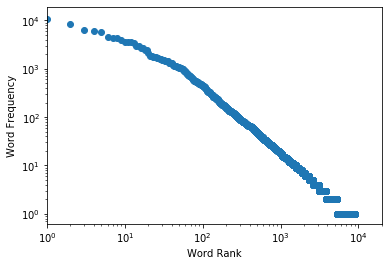

In [26]:
f,ax = plt.subplots()
ax.scatter(rank_list, freq_list, label = "data")
ax.set_xlabel('Word Rank')
ax.set_ylabel('Word Frequency')
ax.set_xscale("log")
ax.set_xlim(1,20000)
ax.set_yscale("log")

In [27]:
def produce_simulated_data(Gamma1, Gamma2, Knee, Number_of_data_points):
    data_points = []
    rank = []
    for i in range(1,Number_of_data_points):
        if i <= Knee:
            x = i**-Gamma1
        else:
            x = Knee**(Gamma2-Gamma1) * i**-Gamma2
        
        data_points.append(x)
        rank.append(i)
    
    return data_points, rank

In [28]:
sim_data, sim_ranks = produce_simulated_data(0.7049346647939667, 1.6405725144919319, 98.28894539100116, 100000)

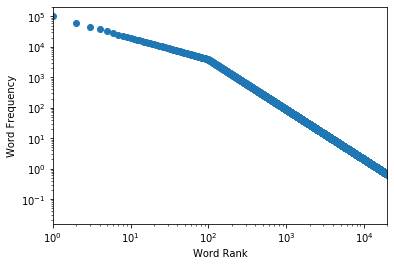

In [29]:
sim_data = np.array(sim_data) * 100000
f,ax = plt.subplots()
ax.scatter(sim_ranks, sim_data, label = "data")
ax.set_xlabel('Word Rank')
ax.set_ylabel('Word Frequency')
ax.set_xscale("log")
ax.set_xlim(1,20000)
ax.set_yscale("log")

In [30]:
def normalisation(LIST):
    normed_list = np.array(LIST) / sum(LIST)
    return normed_list

In [31]:
X = normalisation(freq_list)
sim_data, sim_ranks = produce_simulated_data(0.7049346647939667, 1.6405725144919319, 98.28894539100116, 100000)

Text(0.5, 1.0, "Zipf's Law in the Buckeye corpus")

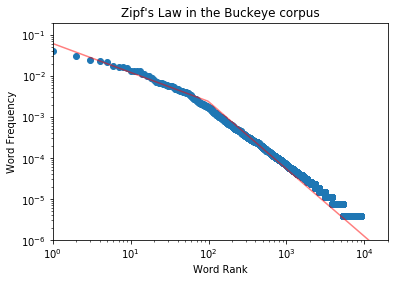

In [39]:
X = normalisation(freq_list)
sim_data, sim_ranks = produce_simulated_data(0.7049346647939667, 1.6405725144919319, 98.28894539100116, 100000)
sim_data = normalisation(sim_data)

f,ax = plt.subplots()
ax.scatter(rank_list, X, label = "data")
ax.plot(sim_ranks, sim_data, label = "data", color='red', alpha = 0.5)
ax.set_xlabel('Word Rank')
ax.set_ylabel('Word Frequency')
ax.set_xscale("log")
ax.set_xlim(1,20000)
ax.set_ylim(0.000001,0.2)
ax.set_yscale("log")
ax.set_title("Zipf's Law in the Buckeye corpus")

In [33]:
sim_data

array([6.14966994e-02, 3.77263968e-02, 2.83473519e-02, ...,
       2.82015773e-08, 2.82011147e-08, 2.82006520e-08])

# Comparing Spontaneous Language to Curated Language

#### Spoken Word vs Written Word

In [40]:
import nltk.corpus
from nltk.corpus import gutenberg
for i in gutenberg.fileids():
    x = gutenberg.words(i)
    x = [word for word in x if word.isalpha()]
    print(i, len(x))

austen-emma.txt 161600
austen-persuasion.txt 84121
austen-sense.txt 120733
bible-kjv.txt 791842
blake-poems.txt 6934
bryant-stories.txt 46611
burgess-busterbrown.txt 16327
carroll-alice.txt 27333
chesterton-ball.txt 82682
chesterton-brown.txt 73286
chesterton-thursday.txt 58724
edgeworth-parents.txt 170737
melville-moby_dick.txt 218361
milton-paradise.txt 80493
shakespeare-caesar.txt 20802
shakespeare-hamlet.txt 30266
shakespeare-macbeth.txt 18272
whitman-leaves.txt 126276


In [52]:
emma1 = gutenberg.words('austen-emma.txt')
emma2 = gutenberg.words('austen-emma.txt')
persuasion = gutenberg.words('austen-persuasion.txt')
sense = gutenberg.words('austen-sense.txt')

# remove punctuation
emma1 = [word for word in emma1 if word.isalpha()]
emma2 = [word for word in emma2 if word.isalpha()]
sense = [word for word in sense if word.isalpha()]
persuasion = [word for word in persuasion if word.isalpha()]

In [42]:
print("Length of Emma:", len(emma1))
print("Length of Persuasion:",len(persuasion))
print("Length of Sense:",len(sense))
print("Length of Emma + Sense:",len(emma1) + len(sense))
print("Length of Emma + Persuasion:", len(emma1) + len(persuasion))
print("Length of Sense + Persuasion:", len(sense) + len(persuasion))

Length of Emma: 161600
Length of Persuasion: 84121
Length of Sense: 120733
Length of Emma + Sense: 282333
Length of Emma + Persuasion: 245721
Length of Sense + Persuasion: 204854


In [135]:
'''Austen_Joined_Text_1 = emma1
for i in sense:
    Austen_Joined_Text_1.append(i)
print(len(Austen_Joined_Text_1))
print(len(set(Austen_Joined_Text_1)))

Austen_Joined_Text_2 = emma2
for i in persuasion:
    Austen_Joined_Text_2.append(i)
print(len(Austen_Joined_Text_2))
print(len(set(Austen_Joined_Text_2)))'''

282333
9725
245721
9424


# Joining Jane Austen Books together to create a sample pool (then reducing sample size to match Buckeye Corpus)

In [56]:
Jane_Austen_Word_List = []
for i in emma1:
    Jane_Austen_Word_List.append(i)
    
for i in sense:
    Jane_Austen_Word_List.append(i)
    
for i in persuasion:
    Jane_Austen_Word_List.append(i)

In [57]:
len(Jane_Austen_Word_List)

366454

In [58]:
random.shuffle(Jane_Austen_Word_List)
#Jane_Austen_Word_List = Jane_Austen_Word_List[:265000]

In [48]:
len(Jane_Austen_Word_List)

265000

In [49]:
word_count = Counter(Jane_Austen_Word_List)
count_count = Counter(word_count)

count_count = sorted(count_count.items(), key=lambda pair: pair[1], reverse=True)
count_words = np.asarray(count_count)[:,0]
freq_of_word_counts = np.asarray(count_count)[:,1]

rank_list = []
freq_list = []
for i in range(len(count_count)):
    x = count_count[i][1]
    freq_list.append(x)
    rank_list.append(i)

nrep=20
rmin_Fit=1
rmax_Fit=None
counts = freq_list
Result = fit_double_powerlaw(counts, nrep, rmin_Fit, rmax_Fit)    

X = normalisation(freq_list)
sim_data, sim_ranks = produce_simulated_data(Result[0][0], Result[0][1], Result[0][2], 100000)
sim_data = normalisation(sim_data)

Text(0.5, 1.0, 'Jane Austen - 282333 tokens, 9725 types')

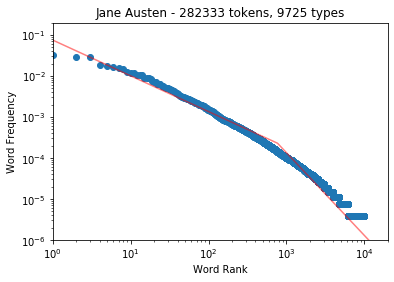

In [50]:
f,ax = plt.subplots()
ax.scatter(rank_list, X, label = "data")
ax.plot(sim_ranks, sim_data, label = "data", color='red', alpha=0.5)
ax.set_xlabel('Word Rank')
ax.set_ylabel('Word Frequency')
ax.set_xscale("log")
ax.set_xlim(1,20000)
ax.set_ylim(0.000001,0.2)
ax.set_yscale("log")
ax.set_title('Jane Austen - )

In [51]:
Result

([0.8699562040916484, 2.0148303403326704, 764.2711673857366],
 6.529387558032081,
 20)

Text(0.5, 1.0, 'Jane Austen 2 - 245721 tokens, 9424 types')

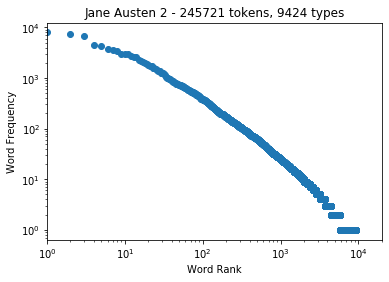

In [138]:
word_count = Counter(Austen_Joined_Text_2)
count_count = Counter(word_count)

count_count = sorted(count_count.items(), key=lambda pair: pair[1], reverse=True)
count_words = np.asarray(count_count)[:,0]
freq_of_word_counts = np.asarray(count_count)[:,1]

rank_list = []
freq_list = []
for i in range(len(count_count)):
    x = count_count[i][1]
    freq_list.append(x)
    rank_list.append(i)

f,ax = plt.subplots()
ax.scatter(rank_list, freq_list, label = "data")
ax.set_xlabel('Word Rank')
ax.set_ylabel('Word Frequency')
ax.set_xscale("log")
ax.set_xlim(1,20000)
ax.set_yscale("log")
ax.set_title('Jane Austen 2 - 245721 tokens, 9424 types')

264165

In [139]:
Result[0][1]

1.6179112766122257

In [167]:
## Consider looking into the Kolmogorov-Smirnov test/distance for comparing the fits to the data? 
## I think thats what the KS test/distance is for...